# color img augmentation

In [1]:
import os, random
import numpy as np
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import imageio

ia.seed(1)

In [55]:
base_dir = '/home/ai_competition36'
target_dir = os.path.join(base_dir, '1.competition_trainset/7_dataset')
img_list = [file_name for file_name in os.listdir(target_dir) if file_name.endswith(".jpg")]

In [56]:
N = len(img_list)
#N=100 #임시로 작게 설정
height = 480
width = 640
channels = 3
images = np.zeros((N, height, width, channels), dtype=np.uint8)
for idx, img in enumerate(img_list):
    img_path = os.path.join(target_dir, img)
    images[idx, :, :, :] = imageio.imread(img_path)
    #if idx==99:
    #    print("stop")
    #    break
    if idx % 1000 == 0:
        print(f'{idx}times iterating...')
print('complete')

0times iterating...
1000times iterating...
2000times iterating...
3000times iterating...
4000times iterating...
5000times iterating...
6000times iterating...
7000times iterating...
8000times iterating...
9000times iterating...
10000times iterating...
11000times iterating...
12000times iterating...
13000times iterating...
14000times iterating...
15000times iterating...
16000times iterating...
17000times iterating...
18000times iterating...
19000times iterating...
complete


In [57]:
#dropout=iaa.Dropout(p=0.2)
#big_dropout=iaa.CoarseDropout(0.02,size_percent=0.1,per_channel=0.5)
#change_to_red=iaa.ChangeColorTemperature((1000,1001))
#change_to_blue=iaa.ChangeColorTemperature((16000,40000))
#이거 두개는 차원이 안맞다고 안됨
#검색해보니까 안되는게 정상인듯? 흠..
#blur=iaa.AverageBlur(k=7)



from imgaug import augmenters as iaa

hue1=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue2=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue3=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(-50))
])
hue4=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(-50))
])
hue5=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue6=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(-50))
])

huelist = [hue1, hue2, hue3, hue4, hue5, hue6]

save_dir=base_dir+'/1.competition_trainset/7_dataset_color'

for i in range(N):
    hue = huelist[i % 6]
    images_aug_hue=hue(image=images[i])
    imageio.imwrite(save_dir + f'/hue{i}.jpg', images_aug_hue)
    if i % 1000 == 0:
      print('{}times iteration...'.format(i))

print('complete')
#hue는 완전 색깔을 바꿔버려서 이게 학습이 도움이 되려나 모르겠음







#for i in range(N):
    #imageio.imwrite(save_dir + f'/dropout{i}_b1.jpg', images_aug_dropout[i])
    #imageio.imwrite(save_dir + f'/bigdropout{i}_b2.jpg', images_aug_bigdropout[i])
    #imageio.imwrite(save_dir + f'/blur{i}_b3.jpg', images_aug_blue[i])
    #imageio.imwrite(save_dir + f'/hue{i}_b3.jpg', images_aug_hue[i])

0times iteration...
1000times iteration...
2000times iteration...
3000times iteration...
4000times iteration...
5000times iteration...
6000times iteration...
7000times iteration...
8000times iteration...
9000times iteration...
10000times iteration...
11000times iteration...
12000times iteration...
13000times iteration...
14000times iteration...
15000times iteration...
16000times iteration...
17000times iteration...
18000times iteration...
19000times iteration...
complete


In [1]:
import os
import shutil

In [2]:
base_dir = '/home/ai_competition36'
for i in range(1,8):
    target_dir = os.path.join(base_dir, f'1.competition_trainset/{i}_dataset')
    txt_list = [file_name for file_name in os.listdir(target_dir) if file_name.endswith(".txt")]
    save_dir = os.path.join(base_dir, f'1.competition_trainset/{i}_dataset_color')
    for idx, txt in enumerate(txt_list):
        src = os.path.join(target_dir, txt)
        dst = os.path.join(save_dir, f'hue{idx}.txt')
        shutil.copy(src, dst)
        if idx % 1000 == 0:
            print(f'{idx}iterations...')
    print(f'{i}_dataset finished')
print('complete')

0iterations...
1000iterations...
2000iterations...
3000iterations...
4000iterations...
5000iterations...
6000iterations...
7000iterations...
8000iterations...
9000iterations...
10000iterations...
11000iterations...
12000iterations...
13000iterations...
14000iterations...
15000iterations...
16000iterations...
17000iterations...
18000iterations...
19000iterations...
20000iterations...
1_dataset finished
0iterations...
1000iterations...
2000iterations...
3000iterations...
4000iterations...
2_dataset finished
0iterations...
1000iterations...
2000iterations...
3000iterations...
4000iterations...
5000iterations...
6000iterations...
3_dataset finished
0iterations...
1000iterations...
2000iterations...
3000iterations...
4000iterations...
5000iterations...
6000iterations...
7000iterations...
8000iterations...
9000iterations...
4_dataset finished
0iterations...
1000iterations...
2000iterations...
3000iterations...
4000iterations...
5000iterations...
6000iterations...
7000iterations...
5_dataset 

In [1]:
import os

In [13]:
base_dir = '/home/ai_competition36'
target_dir = os.path.join(base_dir, '1.competition_trainset/2_dataset_color')
img_list = [file_name for file_name in os.listdir(target_dir) if file_name.endswith(".jpg")]

In [7]:
txt_list = [file_name for file_name in os.listdir(target_dir) if file_name.endswith(".txt")]

In [14]:
os.listdir(target_dir)

['hue0.jpg',
 'hue1.jpg',
 'hue2.jpg',
 'hue3.jpg',
 'hue4.jpg',
 'hue5.jpg',
 'hue6.jpg',
 'hue7.jpg',
 'hue8.jpg',
 'hue9.jpg',
 'hue10.jpg',
 'hue11.jpg',
 'hue12.jpg',
 'hue13.jpg',
 'hue14.jpg',
 'hue15.jpg',
 'hue16.jpg',
 'hue17.jpg',
 'hue18.jpg',
 'hue19.jpg',
 'hue20.jpg',
 'hue21.jpg',
 'hue22.jpg',
 'hue23.jpg',
 'hue24.jpg',
 'hue25.jpg',
 'hue26.jpg',
 'hue27.jpg',
 'hue28.jpg',
 'hue29.jpg',
 'hue30.jpg',
 'hue31.jpg',
 'hue32.jpg',
 'hue33.jpg',
 'hue34.jpg',
 'hue35.jpg',
 'hue36.jpg',
 'hue37.jpg',
 'hue38.jpg',
 'hue39.jpg',
 'hue40.jpg',
 'hue41.jpg',
 'hue42.jpg',
 'hue43.jpg',
 'hue44.jpg',
 'hue45.jpg',
 'hue46.jpg',
 'hue47.jpg',
 'hue48.jpg',
 'hue49.jpg',
 'hue50.jpg',
 'hue51.jpg',
 'hue52.jpg',
 'hue53.jpg',
 'hue54.jpg',
 'hue55.jpg',
 'hue56.jpg',
 'hue57.jpg',
 'hue58.jpg',
 'hue59.jpg',
 'hue60.jpg',
 'hue61.jpg',
 'hue62.jpg',
 'hue63.jpg',
 'hue64.jpg',
 'hue65.jpg',
 'hue66.jpg',
 'hue67.jpg',
 'hue68.jpg',
 'hue69.jpg',
 'hue70.jpg',
 'hue71.jpg',
 '

In [9]:
txt_list

['hue0.txt',
 'hue1.txt',
 'hue2.txt',
 'hue3.txt',
 'hue4.txt',
 'hue5.txt',
 'hue6.txt',
 'hue7.txt',
 'hue8.txt',
 'hue9.txt',
 'hue10.txt',
 'hue11.txt',
 'hue12.txt',
 'hue13.txt',
 'hue14.txt',
 'hue15.txt',
 'hue16.txt',
 'hue17.txt',
 'hue18.txt',
 'hue19.txt',
 'hue20.txt',
 'hue21.txt',
 'hue22.txt',
 'hue23.txt',
 'hue24.txt',
 'hue25.txt',
 'hue26.txt',
 'hue27.txt',
 'hue28.txt',
 'hue29.txt',
 'hue30.txt',
 'hue31.txt',
 'hue32.txt',
 'hue33.txt',
 'hue34.txt',
 'hue35.txt',
 'hue36.txt',
 'hue37.txt',
 'hue38.txt',
 'hue39.txt',
 'hue40.txt',
 'hue41.txt',
 'hue42.txt',
 'hue43.txt',
 'hue44.txt',
 'hue45.txt',
 'hue46.txt',
 'hue47.txt',
 'hue48.txt',
 'hue49.txt',
 'hue50.txt',
 'hue51.txt',
 'hue52.txt',
 'hue53.txt',
 'hue54.txt',
 'hue55.txt',
 'hue56.txt',
 'hue57.txt',
 'hue58.txt',
 'hue59.txt',
 'hue60.txt',
 'hue61.txt',
 'hue62.txt',
 'hue63.txt',
 'hue64.txt',
 'hue65.txt',
 'hue66.txt',
 'hue67.txt',
 'hue68.txt',
 'hue69.txt',
 'hue70.txt',
 'hue71.txt',
 '

# 기본 이미지셋에 대해서 color augmentation 수행

## 몇 번을 해보는거야...

### 슬프다

In [1]:
import os, random
import numpy as np
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import imageio

ia.seed(1)

In [2]:
base_dir = '/home/ai_competition36'

In [3]:
hue1=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue2=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue3=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(-50))
])
hue4=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(-50))
])
hue5=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue6=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(-50))
])

huelist = [hue1, hue2, hue3, hue4, hue5, hue6]

In [4]:
import shutil

In [31]:
for i in range(2,8):
    target_dir = os.path.join(base_dir, f'1.competition_trainset/{i}_dataset')
    img_list = [file_name for file_name in os.listdir(target_dir) if file_name.endswith(".jpg")]
    save_dir = os.path.join(base_dir, f'1.competition_trainset/{i}_dataset_color')
    N = len(img_list)
    height = 480
    width = 640
    channels = 3
    images = np.zeros((N, height, width, channels), dtype=np.uint8)
    
    for j, img in enumerate(img_list):                                  # 이미지 데이터를 미리 읽어들여 images 4차원 배열에 저장 
        img_path = os.path.join(target_dir, img)
        images[j, :, :, :] = imageio.imread(img_path)
        if j % 1000 == 0:
            print(f'{j}times iterating...')
            
    print(f'{i}_dataset img loading complete')               
        
    for k in range(N):                                                  # 6가지 색깔에 대해서 학습 데이터를 만든다.
        hue = huelist[k % 6]
        images_aug_hue=hue(image=images[k])
        imageio.imwrite(save_dir + f'/hue{k}.jpg', images_aug_hue)
        img_file_name = img_list[k]
        txt_file_name = img_file_name[0:-3] + 'txt'                                # img에 대응되는 txt 파일을 찾는다.
        src = os.path.join(target_dir, txt_file_name)
        dst = os.path.join(save_dir, f'hue{k}.txt')                     # img파일과 같은 이름으로 txt파일 복사해서 저장
        shutil.copy(src, dst)
        if k % 1000 == 0:
            print('{}times augmenting files...'.format(k))
            
    print(f'{i}_dataset complete')
    
print('complete')

0times iterating...
1000times iterating...
2000times iterating...
3000times iterating...
4000times iterating...
2_dataset img loading complete
0times augmenting files...
1000times augmenting files...
2000times augmenting files...
3000times augmenting files...
4000times augmenting files...
2_dataset complete
0times iterating...
1000times iterating...
2000times iterating...
3000times iterating...
4000times iterating...
5000times iterating...
6000times iterating...
3_dataset img loading complete
0times augmenting files...
1000times augmenting files...
2000times augmenting files...
3000times augmenting files...
4000times augmenting files...
5000times augmenting files...
6000times augmenting files...
3_dataset complete
0times iterating...
1000times iterating...
2000times iterating...
3000times iterating...
4000times iterating...
5000times iterating...
6000times iterating...
7000times iterating...
8000times iterating...
9000times iterating...
4_dataset img loading complete
0times augmenting 

# Code verification

## 코드가 제대로 작동되었는지 슬쩍 확인

In [32]:
os.listdir(os.path.join(base_dir, '1.competition_trainset/2_dataset_color'))

['hue0.jpg',
 'hue0.txt',
 'hue1.jpg',
 'hue1.txt',
 'hue2.jpg',
 'hue2.txt',
 'hue3.jpg',
 'hue3.txt',
 'hue4.jpg',
 'hue4.txt',
 'hue5.jpg',
 'hue5.txt',
 'hue6.jpg',
 'hue6.txt',
 'hue7.jpg',
 'hue7.txt',
 'hue8.jpg',
 'hue8.txt',
 'hue9.jpg',
 'hue9.txt',
 'hue10.jpg',
 'hue10.txt',
 'hue11.jpg',
 'hue11.txt',
 'hue12.jpg',
 'hue12.txt',
 'hue13.jpg',
 'hue13.txt',
 'hue14.jpg',
 'hue14.txt',
 'hue15.jpg',
 'hue15.txt',
 'hue16.jpg',
 'hue16.txt',
 'hue17.jpg',
 'hue17.txt',
 'hue18.jpg',
 'hue18.txt',
 'hue19.jpg',
 'hue19.txt',
 'hue20.jpg',
 'hue20.txt',
 'hue21.jpg',
 'hue21.txt',
 'hue22.jpg',
 'hue22.txt',
 'hue23.jpg',
 'hue23.txt',
 'hue24.jpg',
 'hue24.txt',
 'hue25.jpg',
 'hue25.txt',
 'hue26.jpg',
 'hue26.txt',
 'hue27.jpg',
 'hue27.txt',
 'hue28.jpg',
 'hue28.txt',
 'hue29.jpg',
 'hue29.txt',
 'hue30.jpg',
 'hue30.txt',
 'hue31.jpg',
 'hue31.txt',
 'hue32.jpg',
 'hue32.txt',
 'hue33.jpg',
 'hue33.txt',
 'hue34.jpg',
 'hue34.txt',
 'hue35.jpg',
 'hue35.txt',
 'hue36.jpg'

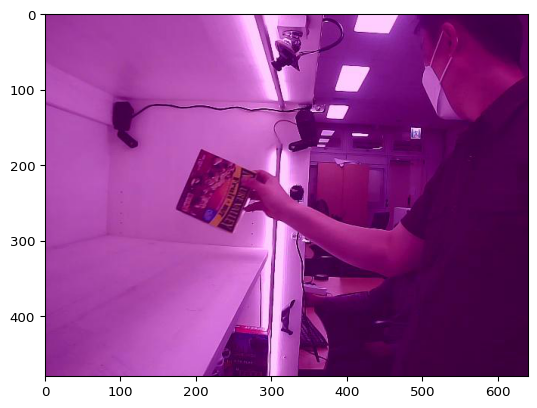

In [42]:
ex_dir = os.path.join(base_dir, '1.competition_trainset/1_dataset_color')
img = imageio.imread(os.path.join(ex_dir, 'hue1.jpg'))
ia.imshow(img)

In [36]:
xt_dir = os.path.join(os.path.join(ex_dir, 'hue1.txt'))
with open (xt_dir, 'r') as myfile:
    data = myfile.readlines()
print(data)

['28 0.64453125 0.3802083333333333 0.1109375 0.16875']


In [30]:
ex_dir1 = os.path.join(base_dir, '1.competition_trainset/1_dataset_color')
xt_dir1 = os.path.join(os.path.join(ex_dir1, 'hue0.txt'))
with open (xt_dir1, 'r') as myfile1:
    data1 = myfile1.readlines()
print(data1)

['37 0.640625 0.7197916666666667 0.459375 0.5604166666666667\n', '33 0.384375 0.740625 0.084375 0.10208333333333333\n', '41 0.26015625 0.5510416666666667 0.2265625 0.5270833333333333\n', '40 0.13984375 0.4083333333333333 0.0546875 0.22916666666666666\n', '43 0.15078125 0.5875 0.0828125 0.17083333333333334']


In [24]:
test_dir = os.path.join(base_dir, '1.competition_trainset/1_dataset')
os.listdir(test_dir)

['Middle_CAPP_cam5_12_11506.jpg',
 'Middle_CAPP_cam4_7_11898.jpg',
 'Middle_CAPP_cam5_10_11565.jpg',
 'Middle_CAPP_cam1_14_11448.txt',
 'Middle_CAPP_cam5_14_11678.jpg',
 'Middle_CAPP_cam2_15_11828.txt',
 'Middle_CAPP_cam4_6_11792.jpg',
 'Middle_CAPP_cam5_13_11358.txt',
 'Middle_CAPP_cam4_4_12647.txt',
 'Middle_CAPP_cam5_3_12433.jpg',
 'Middle_CAPP_cam3_12_11842.jpg',
 'Middle_CAPP_cam5_10_11733.jpg',
 'Middle_CAPP_cam2_15_12623.txt',
 'Middle_CAPP_cam1_15_12602.txt',
 'Middle_CAPP_cam2_14_12579.jpg',
 'Middle_CAPP_cam4_11_12444.txt',
 'Middle_CAPP_cam5_12_12422.txt',
 'Middle_CAPP_cam1_13_12377.jpg',
 'Middle_CAPP_cam5_8_11437.txt',
 'Middle_CAPP_cam3_12_12299.jpg',
 'Middle_CAPP_cam4_7_12242.jpg',
 'Middle_CAPP_cam5_13_11383.jpg',
 'Middle_CAPP_cam2_14_12028.jpg',
 'Middle_CAPP_cam2_2_12582.jpg',
 'Middle_CAPP_cam3_11_11692.jpg',
 'Middle_CAPP_cam5_2_11991.txt',
 'Middle_CAPP_cam1_7_11394.txt',
 'Middle_CAPP_cam5_4_11972.txt',
 'Middle_CAPP_cam1_13_12377.txt',
 'Middle_CAPP_cam3_14_11

# modified 폴더의 img augmentation

In [1]:
import os, random
import numpy as np
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import imageio

ia.seed(3)

In [2]:
import shutil

In [3]:
base_dir = '/home/ai_competition36'

In [4]:
hue1=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue2=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue3=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(-50))
])
hue4=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(-50))
])
hue5=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue6=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(-50))
])

huelist = [hue1, hue2, hue3, hue4, hue5, hue6]

In [5]:
for i in range(2,5):
    target_dir = os.path.join(base_dir, f'1.competition_trainset/modified{i}')
    img_list = [file_name for file_name in os.listdir(target_dir) if file_name.endswith(".jpg")]
    save_dir = os.path.join(base_dir, f'1.competition_trainset/modified{i}_color')
    N = len(img_list)
    height = 480
    width = 640
    channels = 3
    images = np.zeros((N, height, width, channels), dtype=np.uint8)
    
    for j, img in enumerate(img_list):                                  # 이미지 데이터를 미리 읽어들여 images 4차원 배열에 저장 
        img_path = os.path.join(target_dir, img)
        images[j, :, :, :] = imageio.imread(img_path)
        if j % 1000 == 0:
            print(f'{j}times iterating...')
            
    print(f'{i}_dataset img loading complete')               
        
    for k in range(N):                                                  # 6가지 색깔에 대해서 학습 데이터를 만든다.
        hue = huelist[k % 6]
        images_aug_hue=hue(image=images[k])
        imageio.imwrite(save_dir + f'/{k}+background_hue.jpg', images_aug_hue)
        img_file_name = img_list[k]
        txt_file_name = img_file_name[0:-3] + 'txt'                                # img에 대응되는 txt 파일을 찾는다.
        src = os.path.join(target_dir, txt_file_name)
        dst = os.path.join(save_dir, f'{k}+background_hue.txt')                     # img파일과 같은 이름으로 txt파일 복사해서 저장
        shutil.copy(src, dst)
        if k % 1000 == 0:
            print('{}times augmenting files...'.format(k))
            
    print(f'{i}_dataset complete')
    
print('complete')

0times iterating...
1000times iterating...
2000times iterating...
3000times iterating...
4000times iterating...
5000times iterating...
2_dataset img loading complete
0times augmenting files...
1000times augmenting files...
2000times augmenting files...
3000times augmenting files...
4000times augmenting files...
5000times augmenting files...
2_dataset complete
0times iterating...
1000times iterating...
2000times iterating...
3000times iterating...
4000times iterating...
5000times iterating...
3_dataset img loading complete
0times augmenting files...
1000times augmenting files...
2000times augmenting files...
3000times augmenting files...
4000times augmenting files...
5000times augmenting files...
3_dataset complete
0times iterating...
1000times iterating...
2000times iterating...
3000times iterating...
4000times iterating...
5000times iterating...
4_dataset img loading complete
0times augmenting files...
1000times augmenting files...
2000times augmenting files...
3000times augmenting fi

# file check

## 혹시 이상한 파일 만들어진거 아닌지 확인

In [1]:
import os
import imageio
import imgaug as ia

In [2]:
base_dir = '/home/ai_competition36'

In [3]:
os.listdir(os.path.join(base_dir, '5.trainset_overlapplus/overlap1'))

['0_horizontal1.txt',
 '0_horizontal1.jpg',
 '0_horizontal2.txt',
 '0_horizontal2.jpg',
 '0_vertical1.txt',
 '0_vertical1.jpg',
 '0_vertical2.txt',
 '0_vertical2.jpg',
 '0_diagonal1.txt',
 '0_diagonal1.jpg',
 '0_diagonal2.txt',
 '0_diagonal2.jpg',
 '0_diagonal3.txt',
 '0_diagonal3.jpg',
 '0_diagonal4.txt',
 '0_diagonal4.jpg',
 '1_horizontal1.txt',
 '1_horizontal1.jpg',
 '1_horizontal2.txt',
 '1_horizontal2.jpg',
 '1_vertical1.txt',
 '1_vertical1.jpg',
 '1_vertical2.txt',
 '1_vertical2.jpg',
 '1_diagonal1.txt',
 '1_diagonal1.jpg',
 '1_diagonal2.txt',
 '1_diagonal2.jpg',
 '1_diagonal3.txt',
 '1_diagonal3.jpg',
 '1_diagonal4.txt',
 '1_diagonal4.jpg',
 '2_horizontal1.txt',
 '2_horizontal1.jpg',
 '2_horizontal2.txt',
 '2_horizontal2.jpg',
 '2_vertical1.txt',
 '2_vertical1.jpg',
 '2_vertical2.txt',
 '2_vertical2.jpg',
 '2_diagonal1.txt',
 '2_diagonal1.jpg',
 '2_diagonal2.txt',
 '2_diagonal2.jpg',
 '2_diagonal3.txt',
 '2_diagonal3.jpg',
 '2_diagonal4.txt',
 '2_diagonal4.jpg',
 '3_horizontal1.

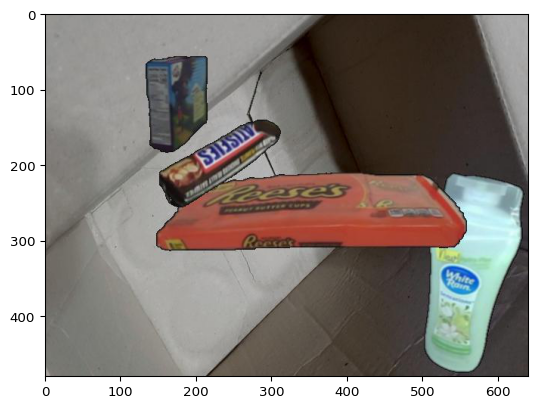

In [19]:
ex_dir = os.path.join(base_dir, 'backgrounds')
img = imageio.imread(os.path.join(ex_dir, '7_diagonal4.jpg'))
ia.imshow(img)

In [9]:
xt_dir = os.path.join(os.path.join(ex_dir, '8overlap_hue.txt'))
with open (xt_dir, 'r') as myfile:
    data = myfile.readlines()
print(data)

['29 0.094375 0.5 0.16875 0.36666666666666664\n', '31 0.22875 0.5 0.26875 0.5395833333333333\n', '5 0.3615625 0.5 0.265625 0.5395833333333333\n', '30 0.44671875 0.5 0.1703125 0.43125\n', '58 0.5115625 0.5 0.1296875 0.5208333333333334\n', '16 0.6412500000000001 0.5 0.259375 0.23333333333333334\n', '9 0.7084375 0.5 0.134375 0.4125\n', '27 0.8232812500000001 0.5 0.2296875 0.4625']


In [13]:
# 그려진 바운딩 박스 테스트
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
%matplotlib inline

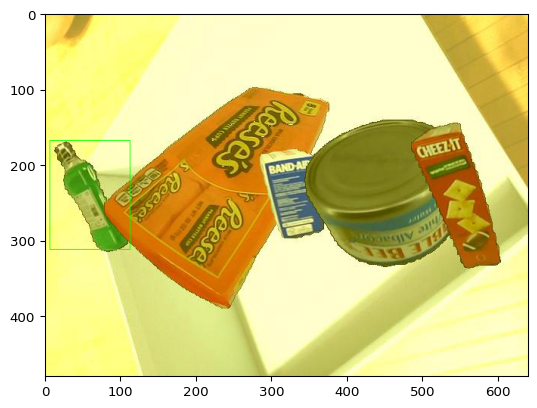

In [19]:
b = data[0].strip().split()
x = float(b[1])
y = float(b[2])
w = float(b[3])
h = float(b[4])
a1 = 640 * (x - w/2)
a2 = 640 * (x + w/2)
b1 = 480 * (y - h/2)
b2 = 480 * (y + h/2)

bbs = BoundingBoxesOnImage([
    BoundingBox(x1=a1, x2=a2, y1=b1, y2=b2)
], shape=img.shape)

ia.imshow(bbs.draw_on_image(img))

# overlap 폴더 color augmentation

In [1]:
import os, random
import numpy as np
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import imageio

In [2]:
import shutil

In [3]:
base_dir = '/home/ai_competition36'

In [4]:
hue1=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue2=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue3=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(-50))
])
hue4=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(-50))
])
hue5=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(-50)),
    iaa.WithChannels([2], iaa.Add(50))
])
hue6=iaa.Sequential([
    iaa.WithChannels([0], iaa.Add(-50)),
    iaa.WithChannels([1], iaa.Add(50)),
    iaa.WithChannels([2], iaa.Add(-50))
])

huelist = [hue1, hue2, hue3, hue4, hue5, hue6]

In [6]:

    target_dir = os.path.join(base_dir, f'6.trainset_overlap_pp/overlap')
    img_list = [file_name for file_name in os.listdir(target_dir) if file_name.endswith(".jpg")]
    save_dir = os.path.join(base_dir, f'6.trainset_overlap_pp/overlap_color')
    N = len(img_list)
    height = 480
    width = 640
    channels = 3
    images = np.zeros((N, height, width, channels), dtype=np.uint8)
    
    for j, img in enumerate(img_list):                                  # 이미지 데이터를 미리 읽어들여 images 4차원 배열에 저장 
        img_path = os.path.join(target_dir, img)
        images[j, :, :, :] = imageio.imread(img_path)
        if j % 1000 == 0:
            print(f'{j}times iterating...')
            
    print('dataset img loading complete')               
        
    for k in range(N):                                                  # 6가지 색깔에 대해서 학습 데이터를 만든다.
        hue = huelist[k % 6]
        images_aug_hue=hue(image=images[k])
        imageio.imwrite(save_dir + f'/{k}overlap_hue.jpg', images_aug_hue)
        img_file_name = img_list[k]
        txt_file_name = img_file_name[0:-3] + 'txt'                                # img에 대응되는 txt 파일을 찾는다.
        src = os.path.join(target_dir, txt_file_name)
        dst = os.path.join(save_dir, f'{k}overlap_hue.txt')                     # img파일과 같은 이름으로 txt파일 복사해서 저장
        shutil.copy(src, dst)
        if k % 1000 == 0:
            print('{}times augmenting files...'.format(k))
            
    
    print('complete')

0times iterating...
1000times iterating...
2000times iterating...
3000times iterating...
4000times iterating...
5000times iterating...
6000times iterating...
7000times iterating...
8000times iterating...
9000times iterating...
10000times iterating...
11000times iterating...
12000times iterating...
13000times iterating...
14000times iterating...
15000times iterating...
16000times iterating...
17000times iterating...
18000times iterating...
19000times iterating...
20000times iterating...
21000times iterating...
22000times iterating...
23000times iterating...
24000times iterating...
25000times iterating...
26000times iterating...
27000times iterating...
28000times iterating...
29000times iterating...
30000times iterating...
31000times iterating...
32000times iterating...
33000times iterating...
34000times iterating...
35000times iterating...
36000times iterating...
37000times iterating...
38000times iterating...
39000times iterating...
dataset img loading complete
0times augmenting files.

In [7]:
    target_dir = os.path.join(base_dir, f'7.trainset_overlap_ppp/overlap')
    img_list = [file_name for file_name in os.listdir(target_dir) if file_name.endswith(".jpg")]
    save_dir = os.path.join(base_dir, f'7.trainset_overlap_ppp/overlap_color')
    N = len(img_list)
    height = 480
    width = 640
    channels = 3
    images = np.zeros((N, height, width, channels), dtype=np.uint8)
    
    for j, img in enumerate(img_list):                                  # 이미지 데이터를 미리 읽어들여 images 4차원 배열에 저장 
        img_path = os.path.join(target_dir, img)
        images[j, :, :, :] = imageio.imread(img_path)
        if j % 1000 == 0:
            print(f'{j}times iterating...')
            
    print('dataset img loading complete')               
        
    for k in range(N):                                                  # 6가지 색깔에 대해서 학습 데이터를 만든다.
        hue = huelist[k % 6]
        images_aug_hue=hue(image=images[k])
        imageio.imwrite(save_dir + f'/{k}overlap_hue.jpg', images_aug_hue)
        img_file_name = img_list[k]
        txt_file_name = img_file_name[0:-3] + 'txt'                                # img에 대응되는 txt 파일을 찾는다.
        src = os.path.join(target_dir, txt_file_name)
        dst = os.path.join(save_dir, f'{k}overlap_hue.txt')                     # img파일과 같은 이름으로 txt파일 복사해서 저장
        shutil.copy(src, dst)
        if k % 1000 == 0:
            print('{}times augmenting files...'.format(k))

    
    print('complete')

0times iterating...
1000times iterating...
2000times iterating...
3000times iterating...
4000times iterating...
5000times iterating...
6000times iterating...
7000times iterating...
8000times iterating...
9000times iterating...
10000times iterating...
11000times iterating...
12000times iterating...
13000times iterating...
14000times iterating...
15000times iterating...
16000times iterating...
17000times iterating...
18000times iterating...
19000times iterating...
20000times iterating...
21000times iterating...
22000times iterating...
23000times iterating...
24000times iterating...
25000times iterating...
26000times iterating...
27000times iterating...
28000times iterating...
29000times iterating...
30000times iterating...
31000times iterating...
32000times iterating...
33000times iterating...
34000times iterating...
35000times iterating...
36000times iterating...
37000times iterating...
38000times iterating...
39000times iterating...
dataset img loading complete
0times augmenting files.

In [8]:
    target_dir = os.path.join(base_dir, 'backgrounds')
    img_list = [file_name for file_name in os.listdir(target_dir) if file_name.endswith(".jpg")]
    save_dir = os.path.join(base_dir, '8.trainset_nothing/only_background')
    N = len(img_list)
    height = 480
    width = 640
    channels = 3
    images = np.zeros((N, height, width, channels), dtype=np.uint8)
    
    for j, img in enumerate(img_list):                                  # 이미지 데이터를 미리 읽어들여 images 4차원 배열에 저장 
        img_path = os.path.join(target_dir, img)
        images[j, :, :, :] = imageio.imread(img_path)
        if j % 1000 == 0:
            print(f'{j}times iterating...')
            
    print('dataset img loading complete')               
        
    for k in range(N):                                                  # 6가지 색깔에 대해서 학습 데이터를 만든다.
        imageio.imwrite(save_dir + f'/{k}only_background.jpg', images[k])
        f = open(save_dir + f'/{k}only_background.txt', 'w')
        f.close()
        for i, hue in enumerate(huelist):
            images_aug_hue=hue(image=images[k])
            imageio.imwrite(save_dir + f'/{k}only_background_hue{i}.jpg', images_aug_hue)
            f = open(save_dir + f'/{k}only_background_hue{i}.txt', 'w')
            f.close()
        if k % 1000 == 0:
            print('{}times augmenting files...'.format(k))
            
    
    print('complete')

0times iterating...
dataset img loading complete
0times augmenting files...
complete
